# Data Visualization Part 2

The objective for today is to work through some guided examples with pandas and matplotlib to create our own plots. We will also gently introduce dictionaries which you may have seem already in this class.

In [9]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Let's plot error bars since Noah loves a data point with uncertainty attached to it

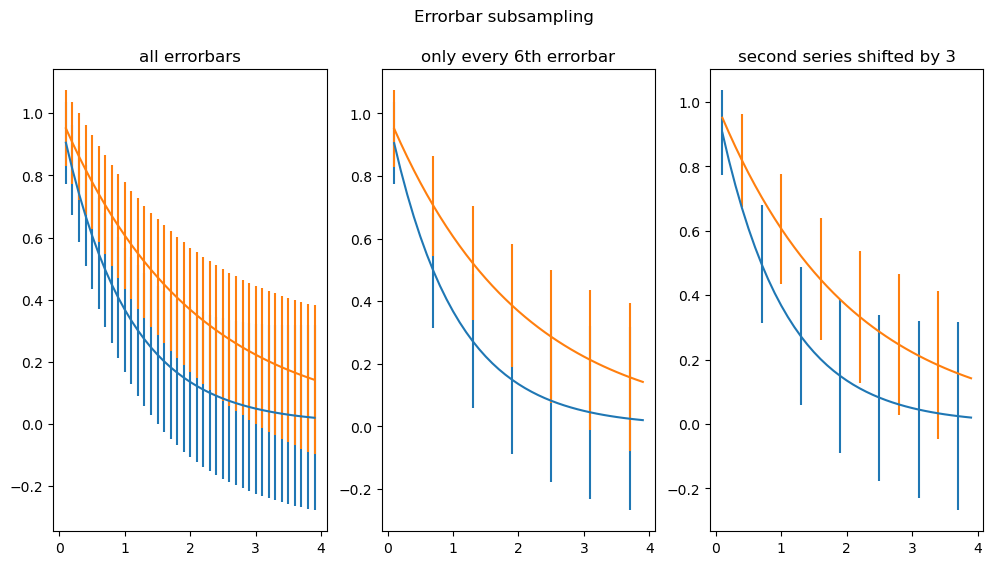

In [2]:
# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')
plt.show()

### Instead of error bars, let's make a continous polygon around the data

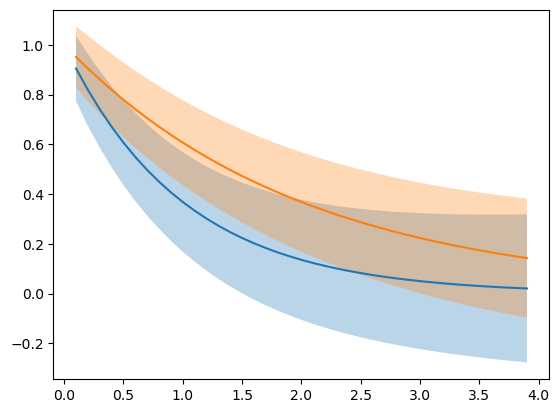

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.fill_between(x, y1 - y1err, y1 + y1err, alpha=0.3, label='Error Range')
ax.fill_between(x, y2 - y2err, y2 + y2err, alpha=0.3, label='Error Range')

### Let's add a legend

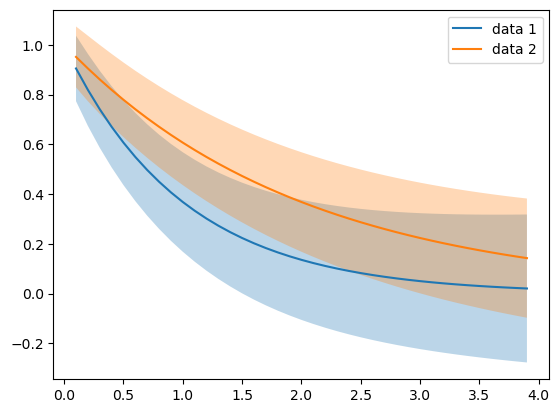

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y1, label = 'data 1')
ax.plot(x, y2, label = 'data 2')
ax.fill_between(x, y1 - y1err, y1 + y1err, alpha=0.3)
ax.fill_between(x, y2 - y2err, y2 + y2err, alpha=0.3)
ax.legend()

## Excerise 1: Change the legend (font size, location, etc). Also change the tick frequency

### Plotting with pandas vs. matplotlib

Pandas has a great matplotlib wrapper which makes visualizing data very efficient. Pandas.plot() method is great for quick views of data, and sometimes for "publication quality" figures. Though, many might argue that just using matplotlib is better for "publication quality" since the user has more control of the figure.

### Let's plot a time series with pandas

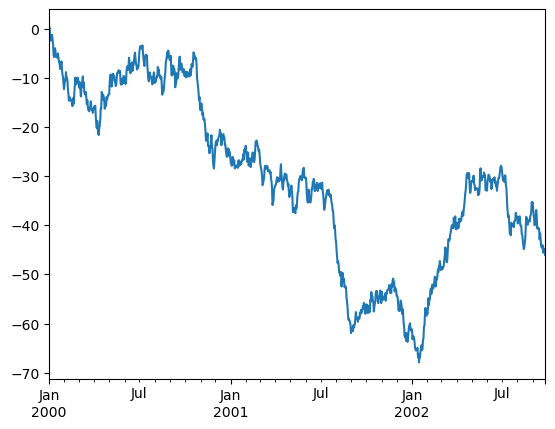

In [16]:
np.random.seed(123456)

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

### Now multiple time series

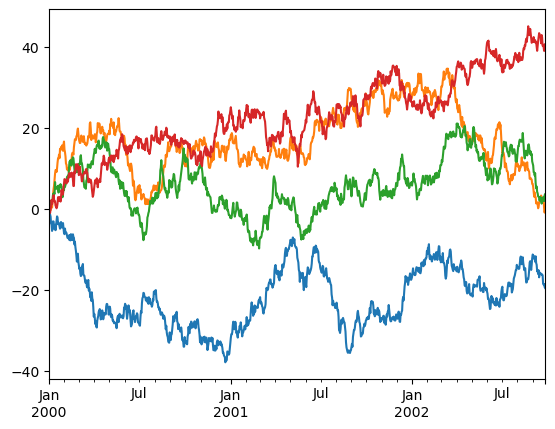

In [17]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()

df.plot(legend=False);

### On multiple axes

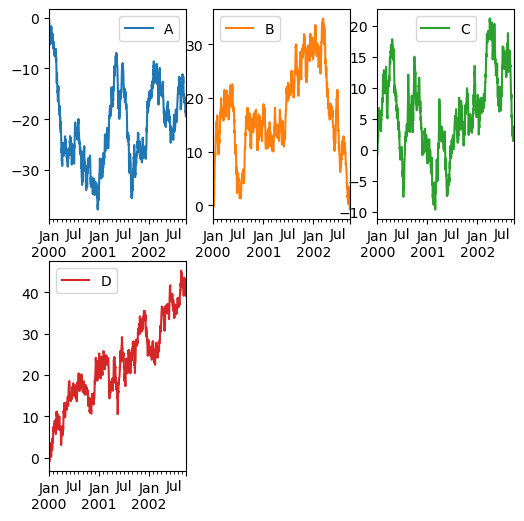

In [18]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

## Excerise 2: plotting on multiple axes with matplotlib

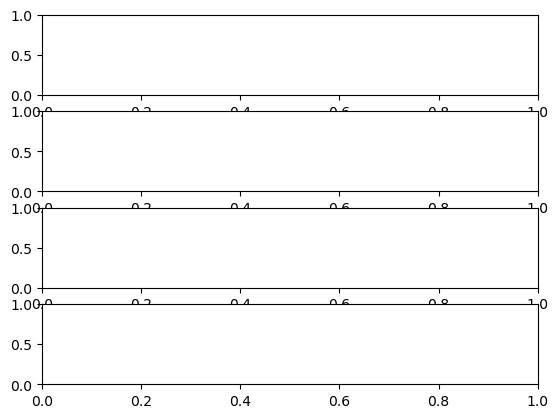

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=1)

## Excerise 3: What is everyone's favorite plot? Can we try to recreate one?

I love contourf plots with matplotlib

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# invent some numbers, turning the x and y arrays into simple
# 2d arrays, which make combining them together easier.
x = np.linspace(-3, 5, 150).reshape(1, -1)
y = np.linspace(-3, 5, 120).reshape(-1, 1)
z = np.cos(x) + np.sin(y)

# we no longer need x and y to be 2 dimensional, so flatten them.
x, y = x.flatten(), y.flatten()

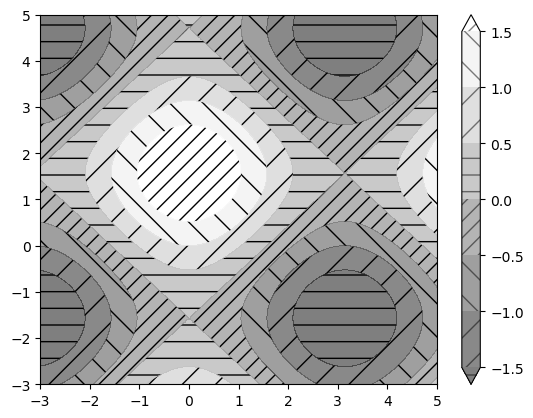

In [24]:
fig1, ax1 = plt.subplots()
cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
                  cmap='gray', extend='both', alpha=0.5)
fig1.colorbar(cs)

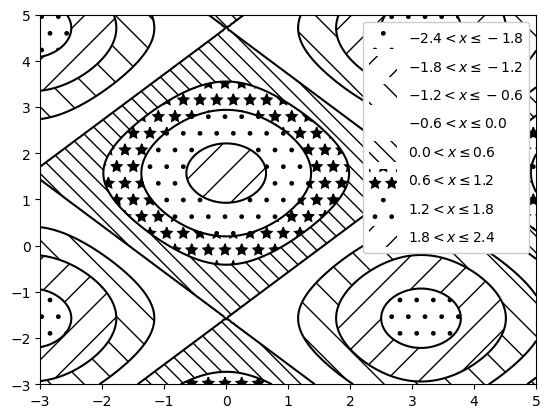

In [25]:
fig2, ax2 = plt.subplots()
n_levels = 6
ax2.contour(x, y, z, n_levels, colors='black', linestyles='-')
cs = ax2.contourf(x, y, z, n_levels, colors='none',
                  hatches=['.', '/', '\\', None, '\\\\', '*'],
                  extend='lower')

# create a legend for the contour set
artists, labels = cs.legend_elements(str_format='{:2.1f}'.format)
ax2.legend(artists, labels, handleheight=2, framealpha=1)
plt.show()

# Some small tips

Using a python dictionary is a great way to make easily reproducible figures. Instead of typing in the keyword parameter everytime we can simply pass in a dictionary to the ax and reuse it as many times as we want. 